In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [203]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

* Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

* IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [204]:
titanic[["Sex","Survived"]]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [205]:
titanic.groupby(["Sex"])["Survived"].mean() 

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [206]:
mean_encoding = titanic.groupby(["Sex"])["Survived"].mean()
  
titanic["Sex"] =  titanic["Sex"].map(mean_encoding) 
  
titanic[["Sex","Survived"]]

,Sex,Survived
0,0.188908,0
1,0.742038,1
2,0.742038,1
3,0.742038,1
4,0.188908,0
...,...,...
886,0.188908,0
887,0.742038,1
888,0.742038,0
889,0.188908,1


* Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [207]:
titanic["Embarked"].mode()[0]

'S'

In [208]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0],inplace=True)

In [209]:
titanic.Embarked.isna().sum()

0

In [210]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [211]:
enc_df = pd.DataFrame(enc.fit_transform(titanic[['Embarked']]).toarray())

In [212]:
embarked_df = titanic[["Embarked"]]

In [213]:
OHEdf = embarked_df.join(enc_df)

In [214]:
OHEdf

,Embarked,0,1,2
0,S,0.0,0.0,1.0
1,C,1.0,0.0,0.0
2,S,0.0,0.0,1.0
3,S,0.0,0.0,1.0
4,S,0.0,0.0,1.0
...,...,...,...,...
886,S,0.0,0.0,1.0
887,S,0.0,0.0,1.0
888,S,0.0,0.0,1.0
889,C,1.0,0.0,0.0


In [215]:
OHEdf.columns = ["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]
OHEdf

,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,0.0,0.0,1.0
1,C,1.0,0.0,0.0
2,S,0.0,0.0,1.0
3,S,0.0,0.0,1.0
4,S,0.0,0.0,1.0
...,...,...,...,...
886,S,0.0,0.0,1.0
887,S,0.0,0.0,1.0
888,S,0.0,0.0,1.0
889,C,1.0,0.0,0.0


* Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [216]:
titanic.Cabin.mode()[0]

'B96 B98'

In [217]:
titanic["Cabin"].fillna(titanic["Cabin"].mode()[0],inplace=True)

In [218]:
titanic.Embarked.isna().sum()

0

In [219]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [220]:
titanic.Cabin = oe.fit_transform(titanic[['Cabin']])
titanic.Cabin.head()

0    47.0
1    81.0
2    47.0
3    55.0
4    47.0
Name: Cabin, dtype: float64

# Outlier Handling

* Fare değişkeni için boxplot çizdiriniz.

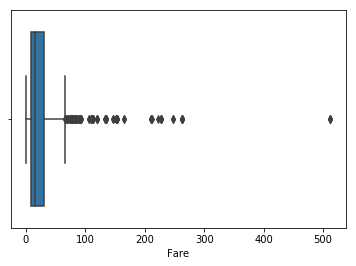

In [221]:
sns.boxplot(titanic.Fare);

* Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [222]:
mean = titanic.Fare.mean() 
std = titanic.Fare.std()
print('mean of the fare is', mean) 
print('std. deviation is', std) 

mean of the fare is 32.2042079685746
std. deviation is 49.693428597180905


In [223]:
z_score_fare = titanic["Fare"].apply(lambda x: (x-mean)/std)

In [224]:
z_score_fare.max(), z_score_fare.min()

(9.661740104981662, -0.6480576784030059)

In [225]:
nonoutlier_fare = z_score_fare[~((z_score_fare<-3) | (z_score_fare>3))]

In [226]:
len(z_score_fare) - len(nonoutlier_fare)

20

In [227]:
nonoutlier_fare.max(), nonoutlier_fare.min()

(2.669618413871152, -0.6480576784030059)

* Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [228]:
z_score_fare[((z_score_fare<-3) | (z_score_fare>=3))]

27     4.644393
88     4.644393
118    4.332899
258    9.661740
299    4.332899
311    4.631815
341    4.644393
377    3.608038
380    3.930516
438    4.644393
527    3.814891
557    3.930516
679    9.661740
689    3.604768
700    3.930516
716    3.930516
730    3.604768
737    9.661740
742    4.631815
779    3.604768
Name: Fare, dtype: float64

In [229]:
z_score_fare[((z_score_fare<=-3) | (z_score_fare>=3))] = nonoutlier_fare.max()

* Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [230]:
Q1 = titanic.Fare.quantile(0.25)
Q3 = titanic.Fare.quantile(0.75)
IQR = Q3-Q1

upper_iqr = (1.5*IQR) + Q3
lower_iqr = 0
print(upper_iqr, lower_iqr)

65.6344 0


In [231]:
len(titanic.Fare[(titanic.Fare > upper_iqr) | (titanic.Fare < lower_iqr)])

116

* Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [232]:
titanic.Fare[(titanic.Fare > upper_iqr)] = upper_iqr

In [233]:
titanic.Fare[(titanic.Fare >= upper_iqr)]

1      65.6344
27     65.6344
31     65.6344
34     65.6344
52     65.6344
        ...   
846    65.6344
849    65.6344
856    65.6344
863    65.6344
879    65.6344
Name: Fare, Length: 116, dtype: float64

In [234]:
titanic.Fare[(titanic.Fare <= lower_iqr)]

179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64

* Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [235]:
titanic = pd.read_csv("train.csv")

In [236]:
lower = titanic.Fare.quantile(0.01)
upper = titanic.Fare.quantile(0.99)
print(upper, lower)

249.00622000000033 0.0


In [237]:
outlier = titanic[(titanic.Fare<lower)|(titanic.Fare>=upper)]
len(outlier)

9

* Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [238]:
titanic.Fare[titanic.Fare>=upper] = upper

* Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

* **Z-Score Yöntemi** : Sınır değerleri -> (2.669618413871152, -0.6480576784030059), Outlier Sayısı -> 20

* **IQR Yöntemi** : Sınır değerleri -> (65.6344, 0), Outlier Sayısı -> 116

* **Hard-Edges Yöntemi** : Sınır değerleri -> (249.00622000000033, 0.0), Outlier Sayısı -> 9

*Fare değişkeni ödenen bilet parasını belirtmektedir, bilet parası sıfırdan küçük olamayacağı için bütün aykırı değerler dağılımın üst kısımda bulunmaktadır. Kullanılan yöntemlerden Hard-Edges yöntemini kullanmak daha iyi olacaktır diye düşünüyorum. Çünkü daha az sayıda veriye işlem uygulamış oluyoruz ve verinin dağılımını çok etkilemiyoruz.*